C:\Users\naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.7655 - loss: 0.6868 - val_accuracy: 0.8490 - val_loss: 0.4364
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8628 - loss: 0.3805 - val_accuracy: 0.8502 - val_loss: 0.4148
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8758 - loss: 0.3392 - val_accuracy: 0.8703 - val_loss: 0.3612
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.8854 - loss: 0.3095 - val_accuracy: 0.8767 - val_loss: 0.3461
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8971 - loss: 0.2844 - val_accuracy: 0.8783 - val_loss: 0.3413
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9002 - loss: 0.2706 - val_accuracy: 0.8795 - val_loss: 0.3411
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9058 - loss: 0.2542 - val_accuracy: 0.8804 - val_loss: 0.3340
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9103 - loss: 0.2402 - 

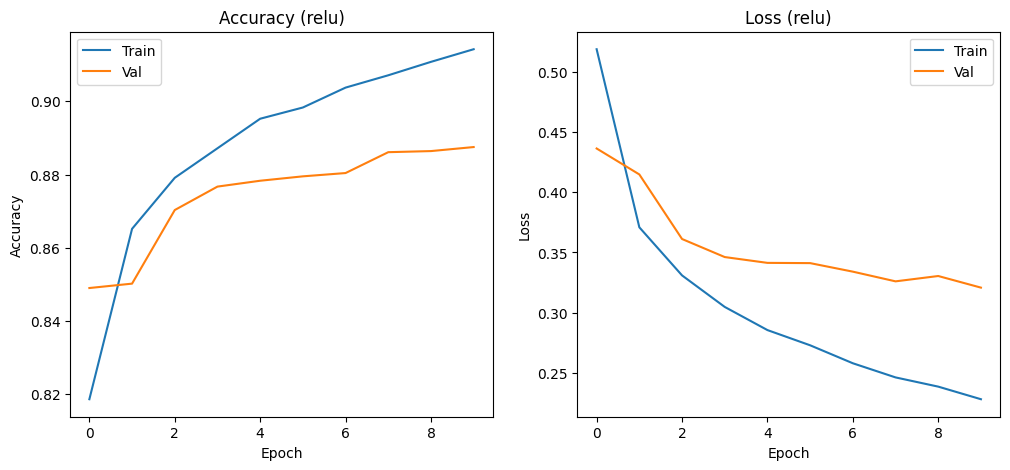

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8853 - loss: 0.3249
Final Validation Accuracy (relu): 0.887499988079071


In [1]:
# ---------------------------------------------------------
# ASSIGNMENT 4: Compare Activation Functions in Neural Networks
#
# • Build a model using ONE activation function.
# • Train it and plot accuracy + loss curves.
# • Repeat separately for sigmoid / tanh / relu.
# ---------------------------------------------------------

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# LOAD DATA
# -----------------------------
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize + Flatten
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# -----------------------------
# CHOOSE ACTIVATION FUNCTION HERE
# -----------------------------
activation_function = 'relu'    # change to 'sigmoid' or 'tanh'

# -----------------------------
# BUILD MODEL
# -----------------------------
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation=activation_function, input_shape=(784,)),
    tf.keras.layers.Dense(128, activation=activation_function),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# TRAIN MODEL
# -----------------------------
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)

# -----------------------------
# PLOT GRAPHS
# -----------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title(f"Accuracy ({activation_function})")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title(f"Loss ({activation_function})")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# -----------------------------
# FINAL ACCURACY
# -----------------------------
loss, acc = model.evaluate(x_test, y_test)
print(f"Final Validation Accuracy ({activation_function}):", acc)
